# XGBoost
https://xgboost.readthedocs.io/en/stable/index.html

##### 핵심 파라미터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier   # xgboost에서는 sklearn과 비슷한 api 제공

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=0)

xgb_clf = XGBClassifier(
    n_esimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0  
)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [15:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_esimators" } are not used.

  warnings.warn(smsg, UserWarning)


1.0
0.9736842105263158


In [8]:
# 유방암 데이터셋 이진분류
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [ ]:
# XGBClassifier에 조기종료 적용 -> 과적합 방지, 훈련시간 단축
xgb_clf = XGBClassifier(
    n_estimators=500, 
    learning_rate=0.1,
    max_depth=3,
    random_state=0,
    early_stopping_rounds=10,   # 반복을 중단할 횟수 이상 향상되지 않으면 조기종료 (반복을 중단할 횟수)
    eval_metric='logloss'
)

X_tr, X_var, y_tr, y_var = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_var, y_var)]
xgb_clf.fit(X_tr, y_tr, eval_set=eval_set, verbose=True)
# eval_set: 검증 데이터, verbose: 학습 중 평가 결과 출력 여부


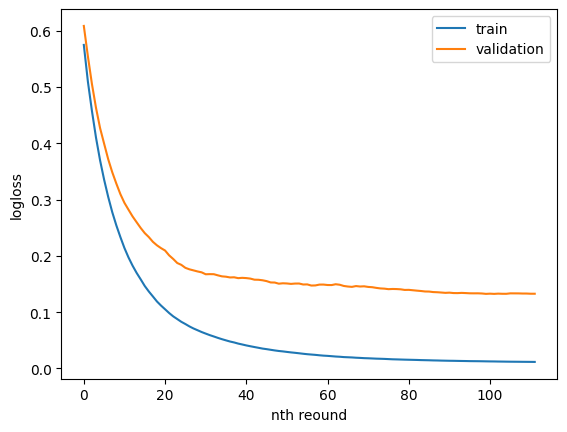

In [10]:
# 훈련 과정 시각화
result = xgb_clf.evals_result()
train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('nth reound')
plt.ylabel('logloss')
plt.show()

In [11]:
xgb_clf.score(X_train, y_train), xgb_clf.score(X_test, y_test)

(0.9882629107981221, 0.972027972027972)

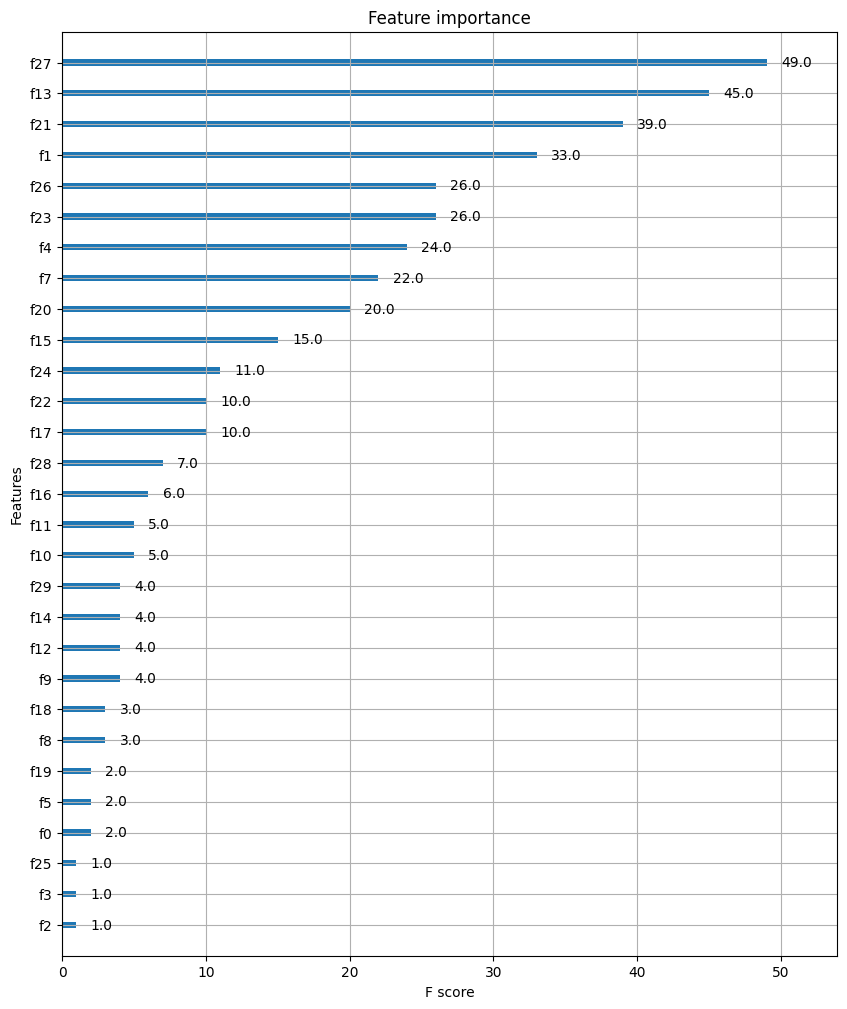

In [14]:
# 특성 중요도 시각화
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf, ax=ax)
plt.show()